In [48]:
from keras.datasets import mnist 
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

In [39]:
import numpy as np



(60000, 28, 28)

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

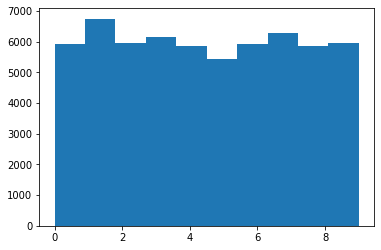

In [54]:
import matplotlib.pyplot as plt
plt.hist(Y_train)

In [53]:
Y_train.where()

(10000, 28, 28)

In [84]:
np.unique(Y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

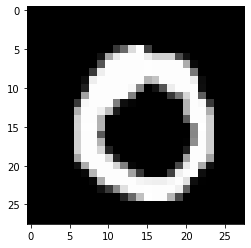

In [143]:
some_digit = X_train[56]
plt.imshow(some_digit,cmap ='gray')

In [150]:
y_train_0 = (Y_train == 0)
y_test_0 = (Y_test == 0)
X_ravel = X_train.reshape((60000,784))

In [145]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_ravel,y_train_0)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [148]:
sgd_clf.predict([some_digit.reshape(784)])

array([ True])

In [153]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits= 3,random_state= 42)

for train_index,test_index in skfolds.split(X_ravel,y_train_0):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_ravel[train_index]
    y_train_folds = y_train_0[train_index]
    X_test_fold = X_ravel[test_index]
    y_test_fold = y_train[test_index]
    
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred ==  y_test_fold)
    print(n_correct / len(y_pred))

0.8259087045647717
0.8109
0.8117405870293515


In [152]:
X_ravel.shape


(60000, 784)